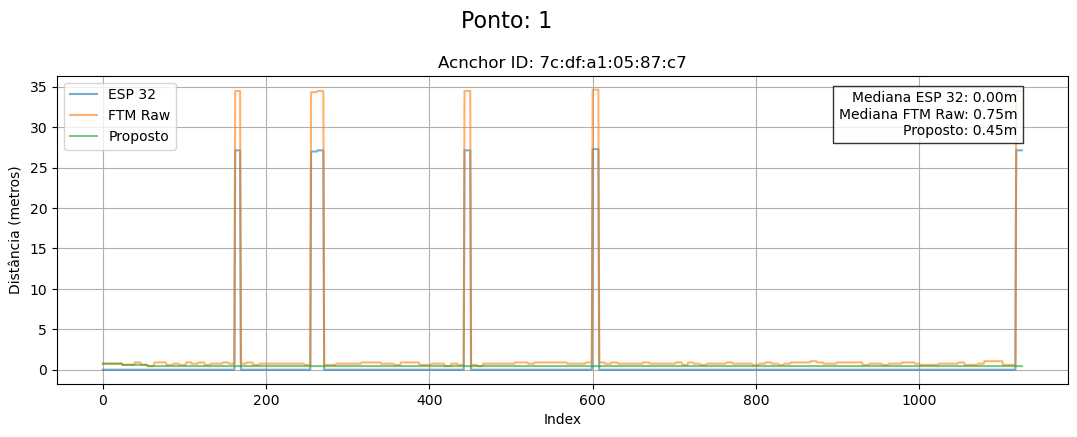

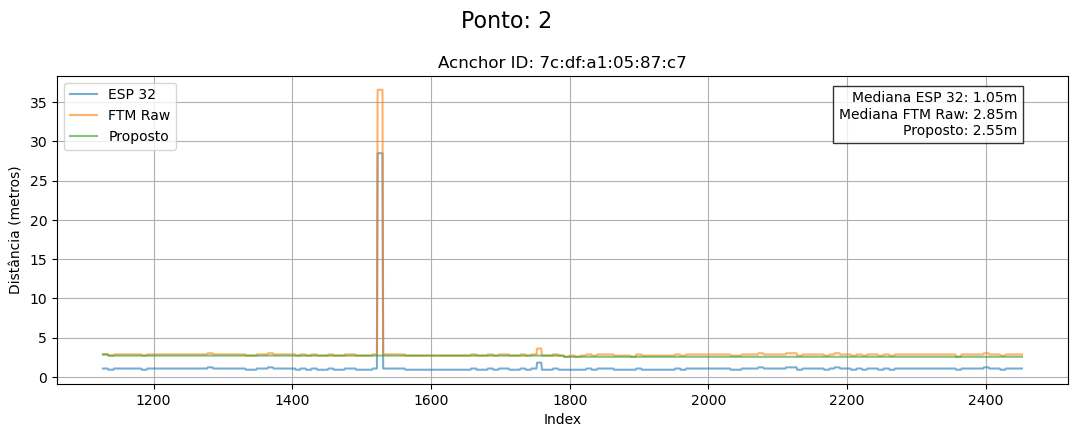

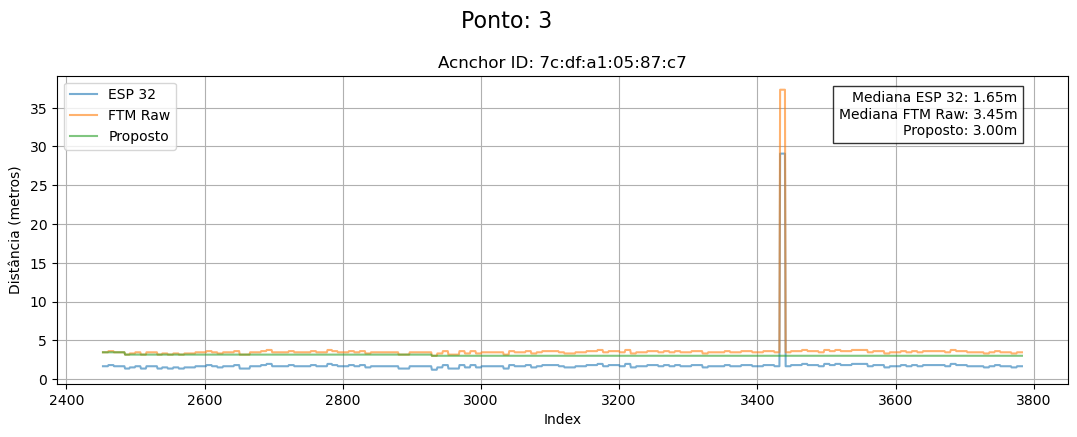

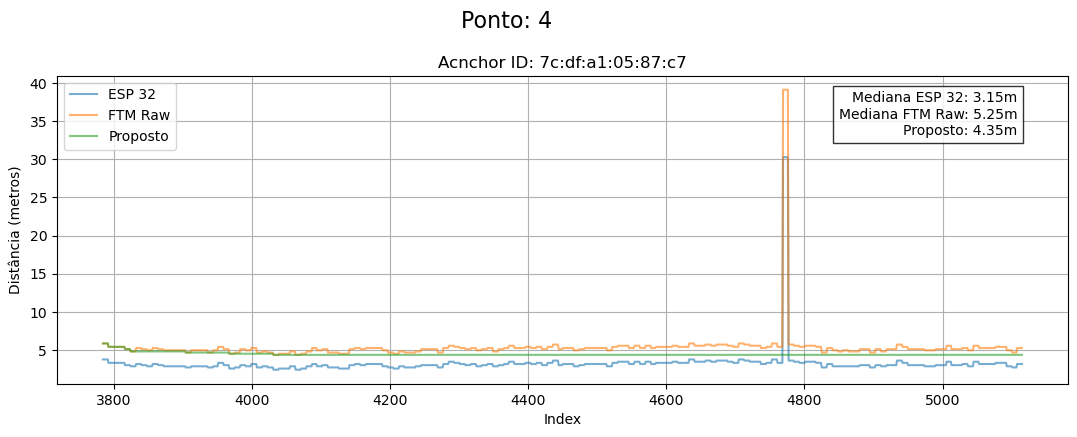

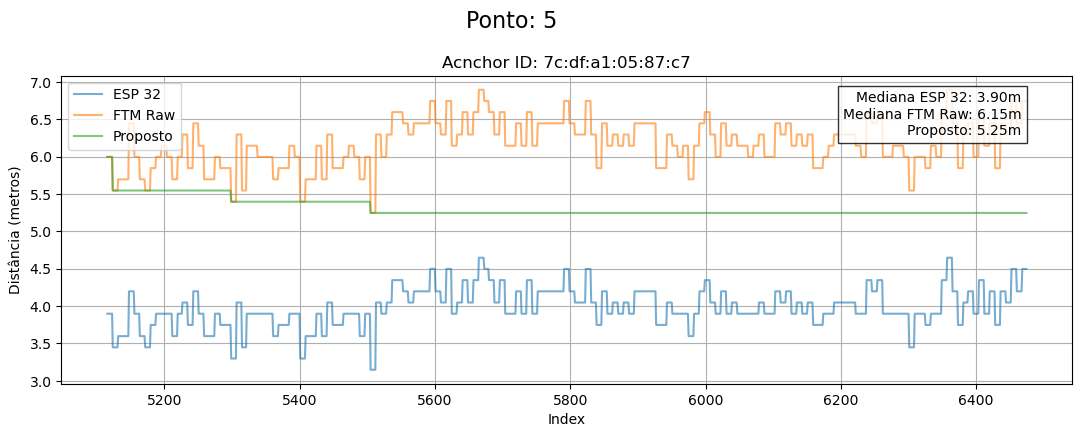

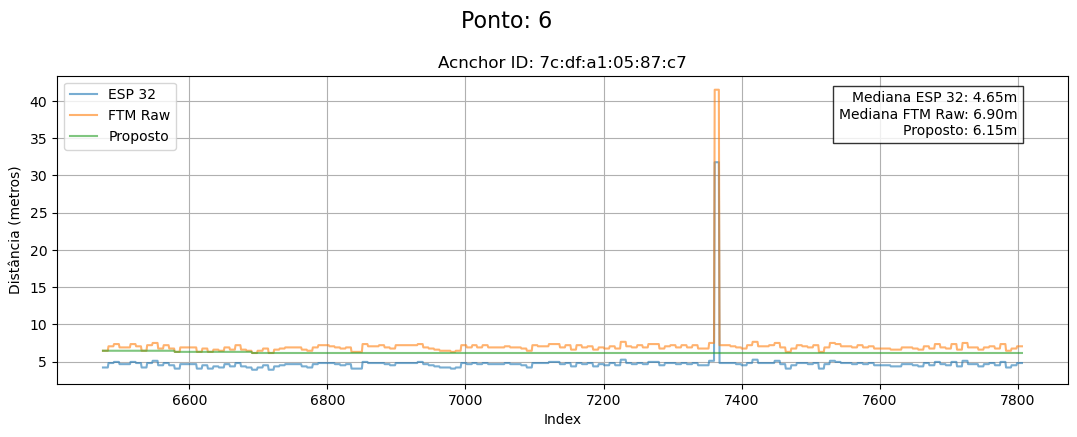

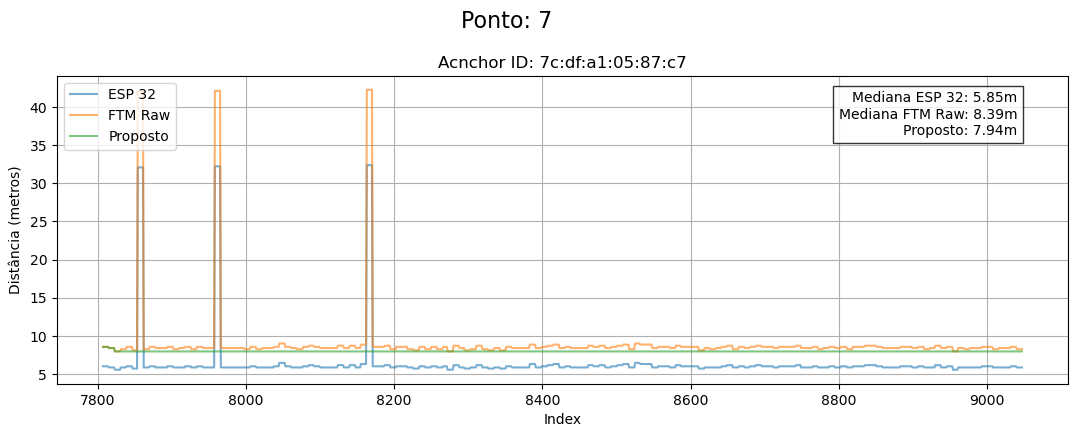

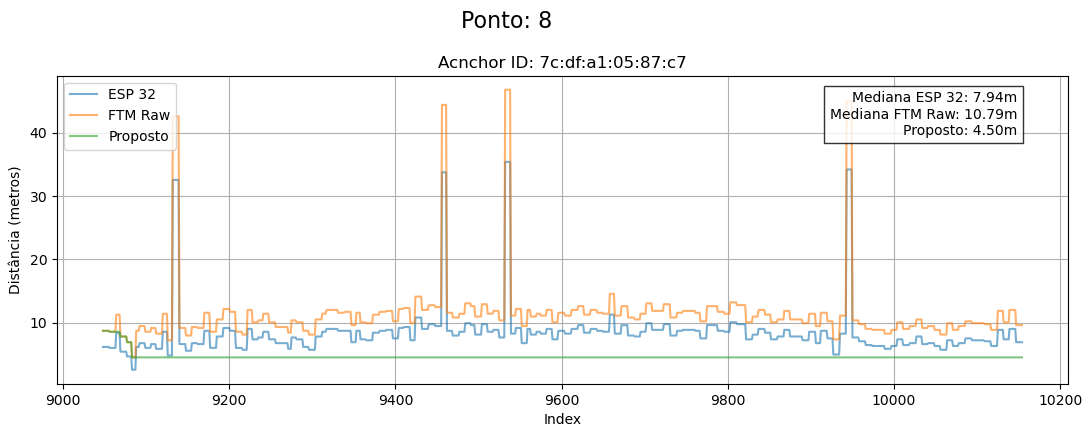

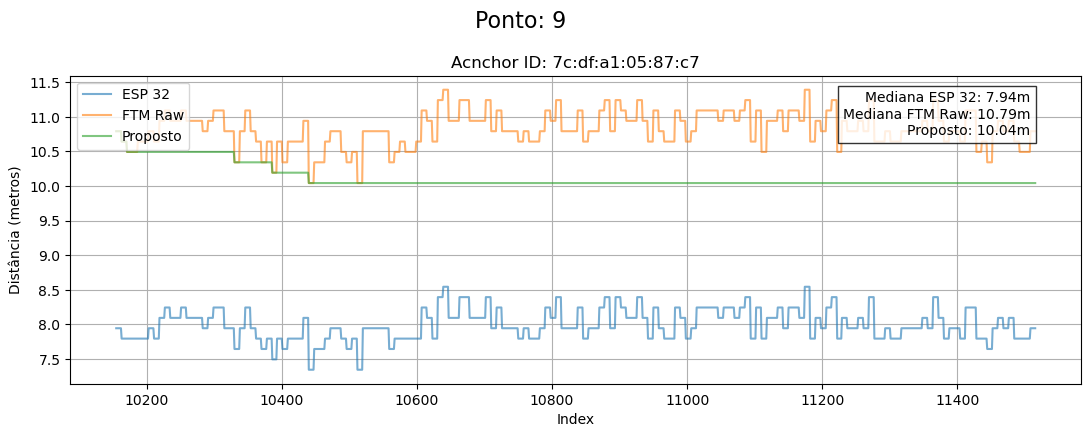

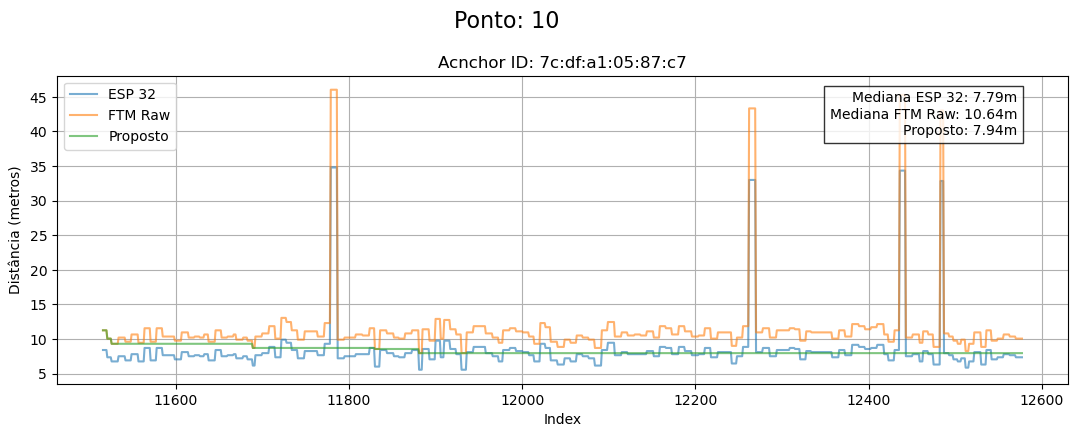

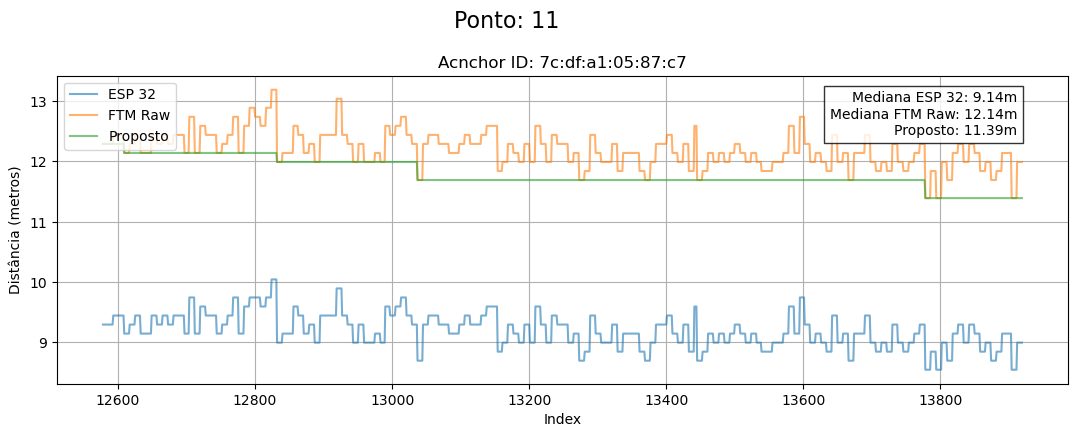

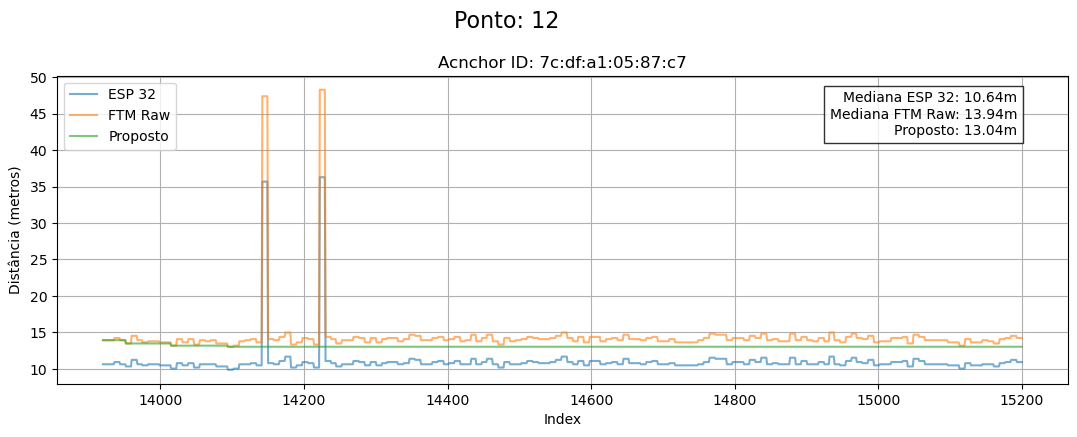

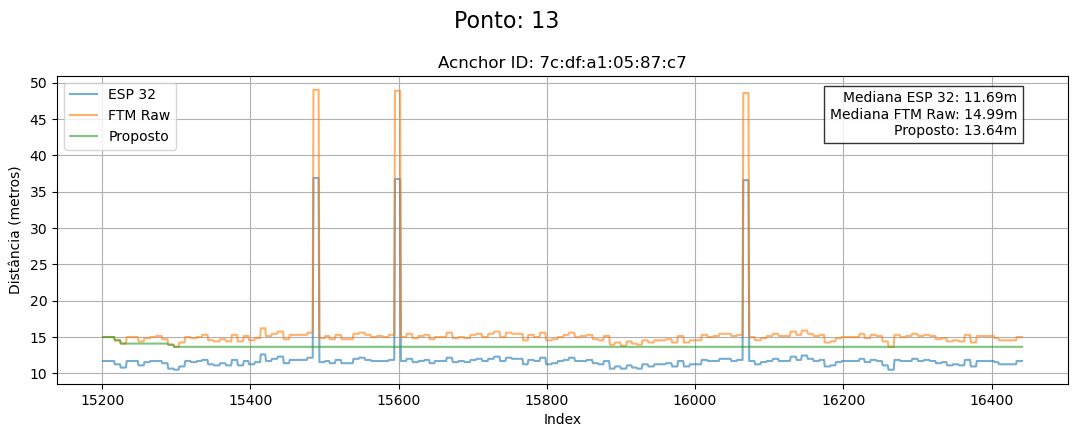

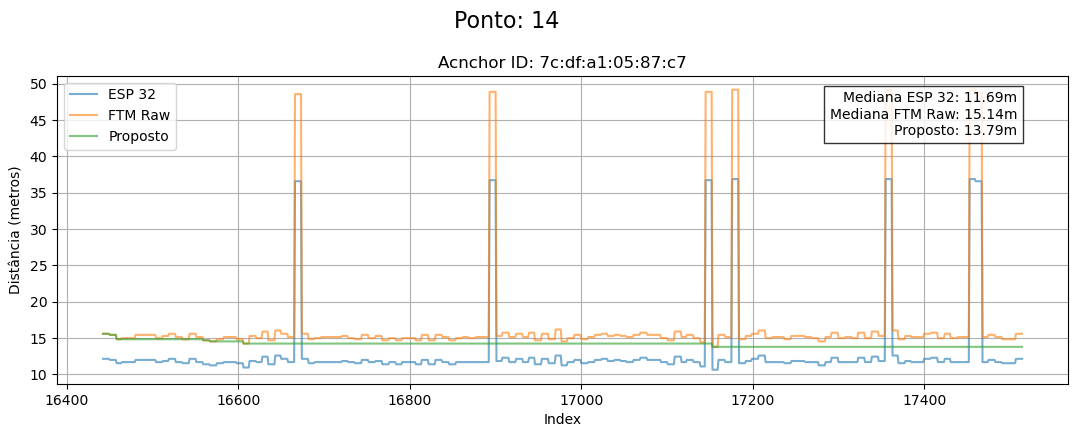

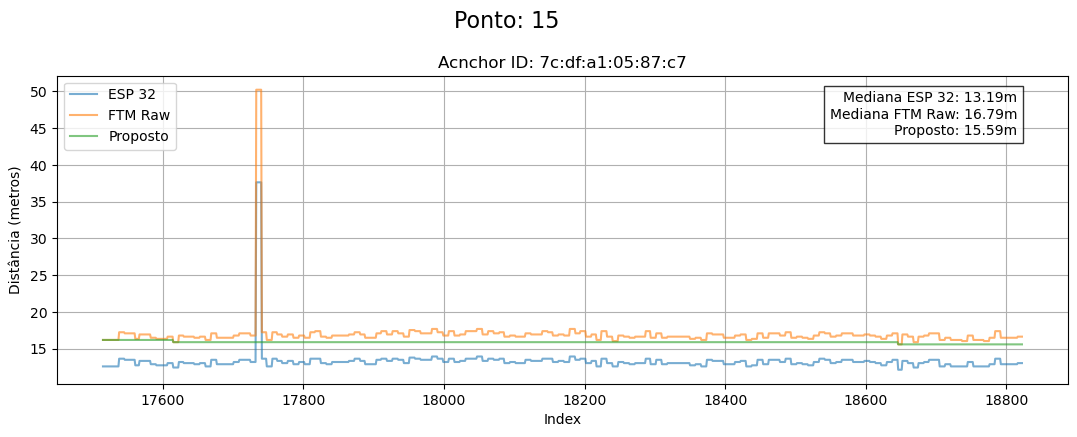

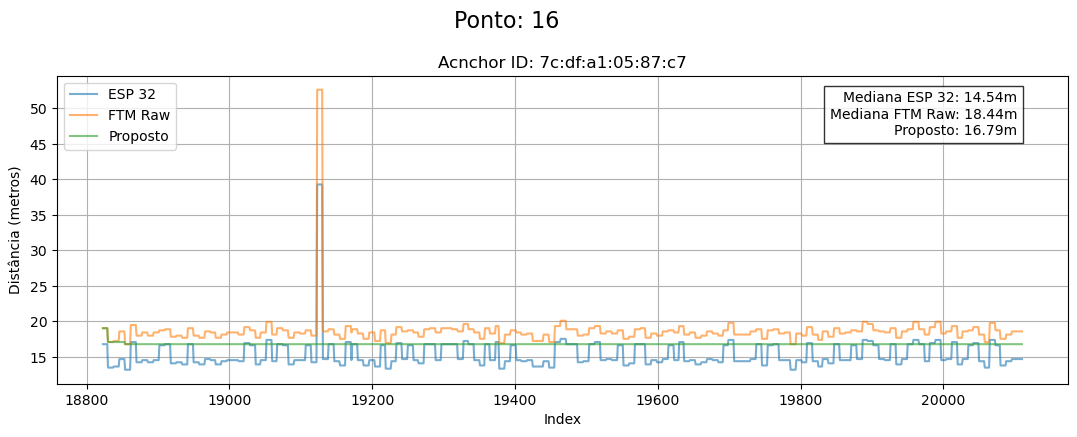

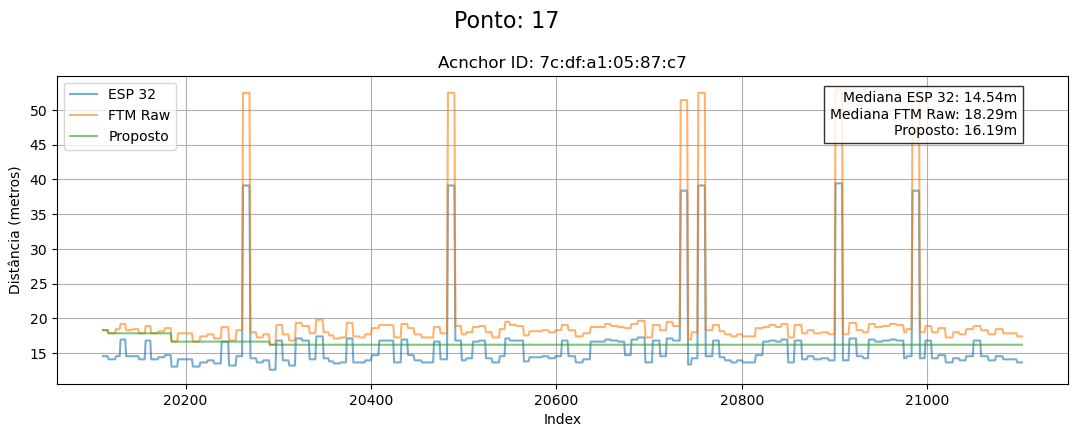

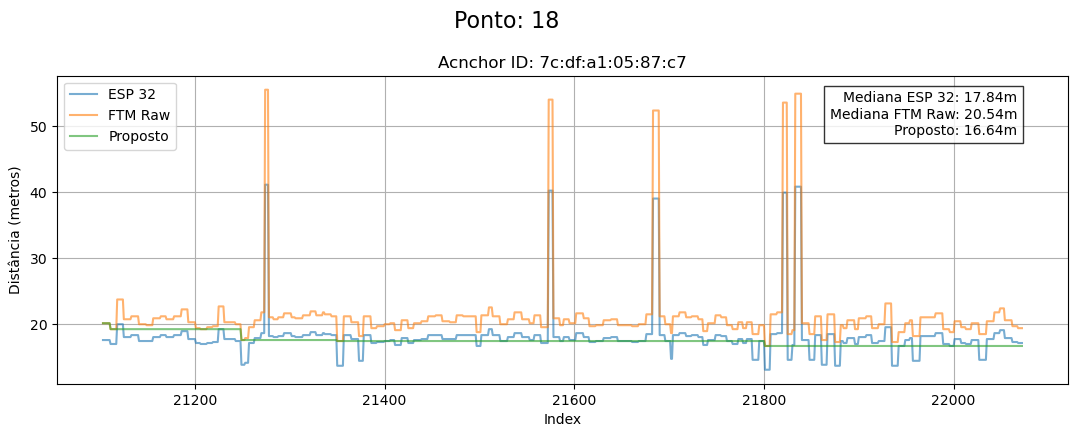

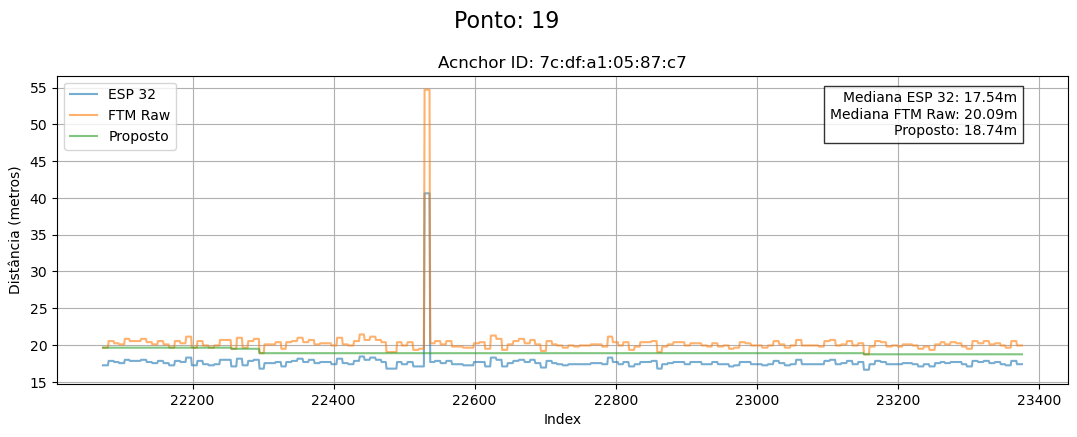

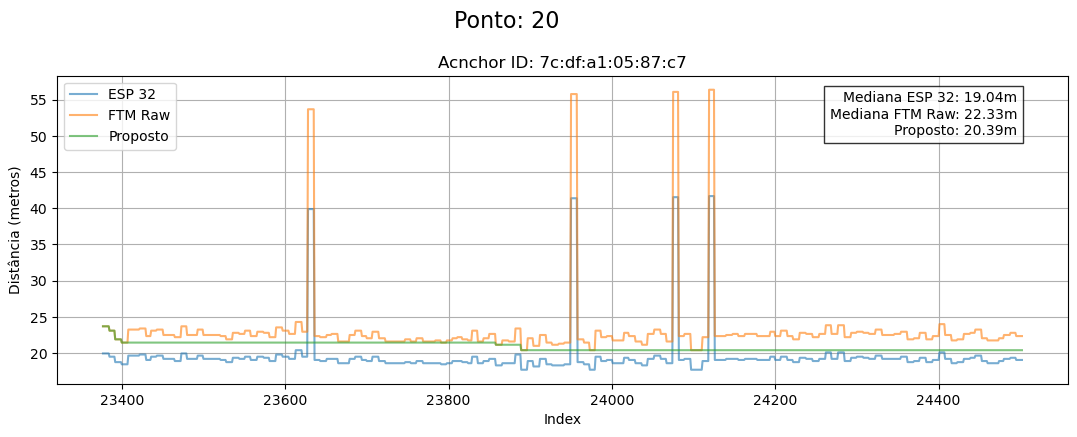

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import math

rawnano2m = 0.299792458 / 2

csv_file = 'outdoor40-raw.csv'
data = pd.read_csv(csv_file)
#print (data.head())

pontos = data.groupby('Ponto')
#print(pontos.head())

# Iterando sobre cada grupo de Ponto
for ponto, group_ponto in data.groupby('Ponto'):

    #print(f"\nPonto: {ponto}")
    fig = plt.figure(figsize=(60, 4))
    fig.text(0.2, 1, f'Ponto: {ponto}', ha='center', fontsize=16)
    position = 0
    
    # Iterando sobre cada valor único de actualDist dentro do grupo Ponto
    for anchorId, group in group_ponto.groupby('anchorId'):
        #print(f"  actualDist: {anchorId}")

        valor = group['rtt_raw'].iloc[0] * rawnano2m
        for index, row in group.iterrows():
            dist = row['rtt_raw'] * rawnano2m
            if dist > valor:
                valor = valor #+ 0.001
            else:
                valor = dist #valor - (valor - dist) * 0.5
            group.at[index, 'dist_calc'] = valor
            
        position = position + 1
        ax = fig.add_subplot(1, 4, position)

        ax.plot(group.index, group['rtt_est'] * rawnano2m, label='ESP 32', alpha=0.6)
        ax.plot(group.index, group['rtt_raw'] * rawnano2m, label='FTM Raw', alpha=0.6)
        ax.plot(group.index, group['dist_calc'], label='Proposto', alpha=0.6)
        
        last_dist = group['dist_calc'].iloc[-1]
        text = f'Mediana ESP 32: {group["rtt_est"].median() * rawnano2m:.2f}m'
        text = text + f'\nMediana FTM Raw: {group["rtt_raw"].median() * rawnano2m:.2f}m'
        text = text + f'\nProposto: {last_dist:.2f}m'
        ax.text(0.95, 0.95, text, 
            transform=ax.transAxes,
            horizontalalignment='right',
            verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.8))

        ax.legend(loc='upper left')
        ax.set_title(f'Acnchor ID: {anchorId}')
        ax.set_xlabel('Index')
        ax.set_ylabel('Distância (metros)')
        ax.grid(True)
    
    #plt.tight_layout()
    plt.show()